In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("bigdatamart_Train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


there are 8523 rows and 12 columns, it has nan values, string float datatypes are present, target variable is Item_outlet_sales.

In [3]:
df_train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

above are the column names of the dataframe

In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

there are 1463 null values in item weight and in outlet_size 2410 null values.

In [5]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
df_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

above are the unique values of each categorical columns

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


there 4 fload datatype column, 1 integer datatype, 7 object datatype.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

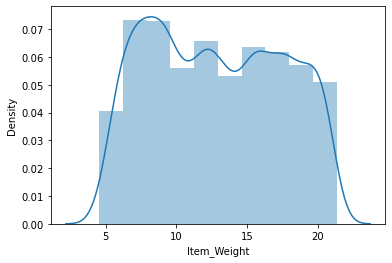

In [12]:
sn.distplot(df_train['Item_Weight'],bins=10)

the graph is skewed

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

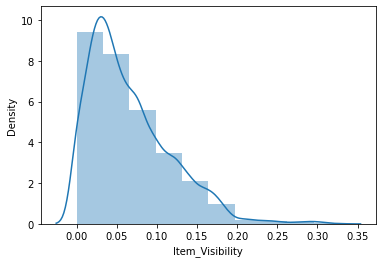

In [13]:
sn.distplot(df_train['Item_Visibility'],bins=10)

graph is skewed

In [14]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


here we can see the minimum value of item visibility is 0 which is impossible, we have to replace 0 with the median values.



In [15]:
a = (df_train['Item_Visibility'] == 0)

print ('Number of 0 values in item visibility: %d'%sum(a))

Number of 0 values in item visibility: 526


In [16]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace([0.000000],[0.053931])

replaced 0 with median of the column

In [18]:
#Get the first two characters of ID:
df_train['Item_Type_Combined'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df_train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

item identifier is the unique id of the product, at the starting of each we can see FD, NC, DR so we will make this as a category of food, non consumable and drinks

In [19]:
df_train.loc[df_train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Fat_Content'].value_counts()

Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

if non consumable column has fat content, it doesnt make sense, so we made a new category in item_fat_content as non edible

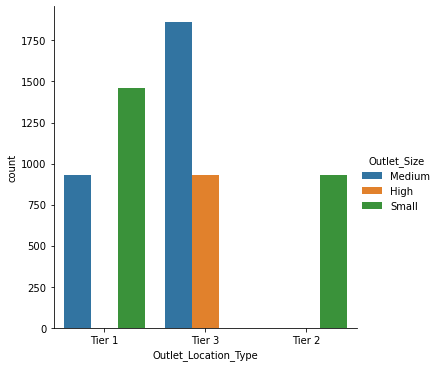

In [21]:
sn.factorplot('Outlet_Location_Type',data = df_train,hue ='Outlet_Size' ,kind='count')

tier 3 has maximum of medium sized outlet

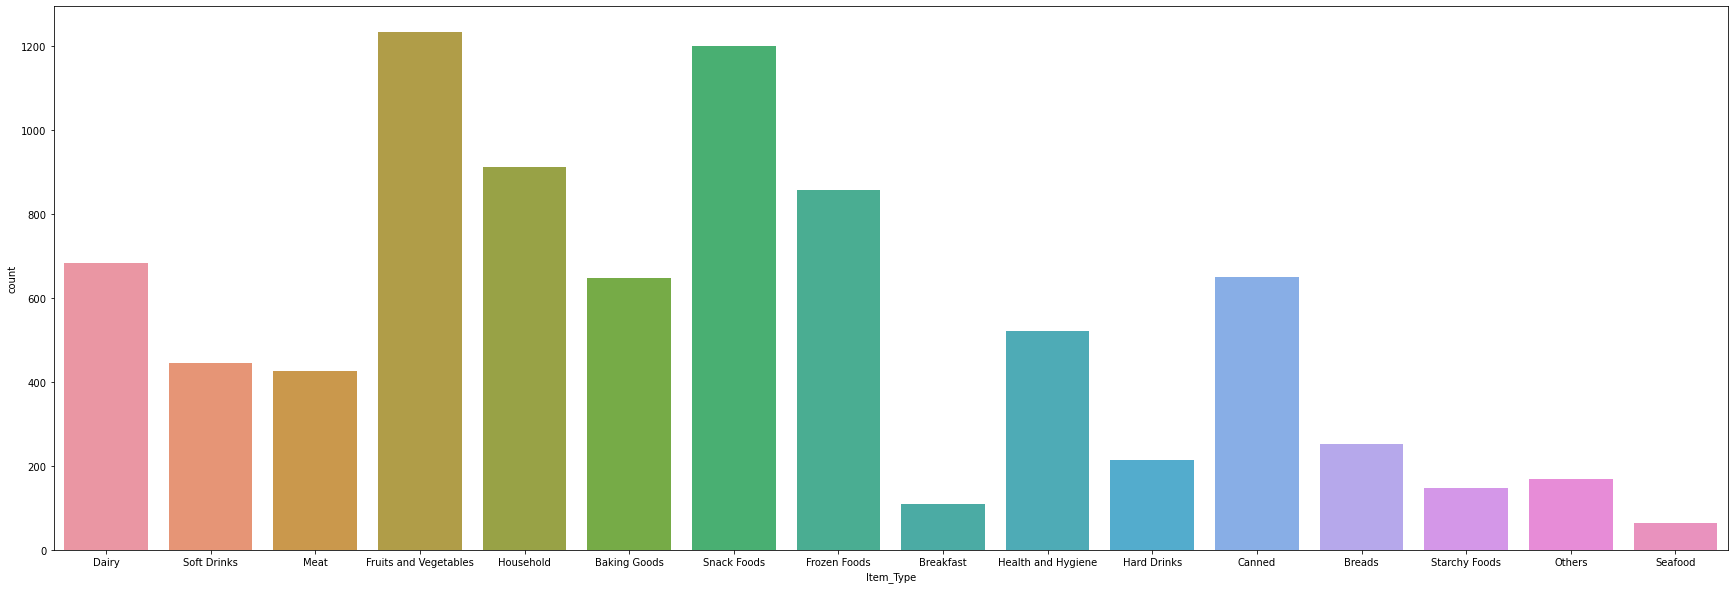

In [22]:
plt.figure(figsize=[30,10])
sn.countplot(df_train['Item_Type']);

highest count in the item type is the fruits and vegetables and lowest is the seafood

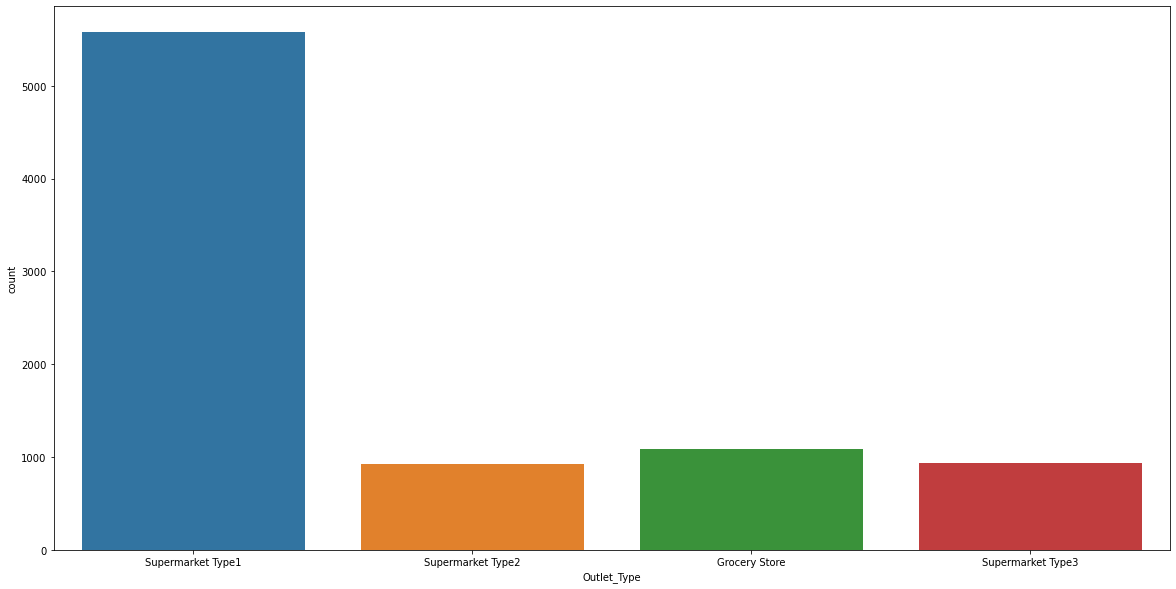

In [23]:
plt.figure(figsize=[20,10])
sn.countplot(df_train['Outlet_Type']);

supermarket type 1 has the highest number of count

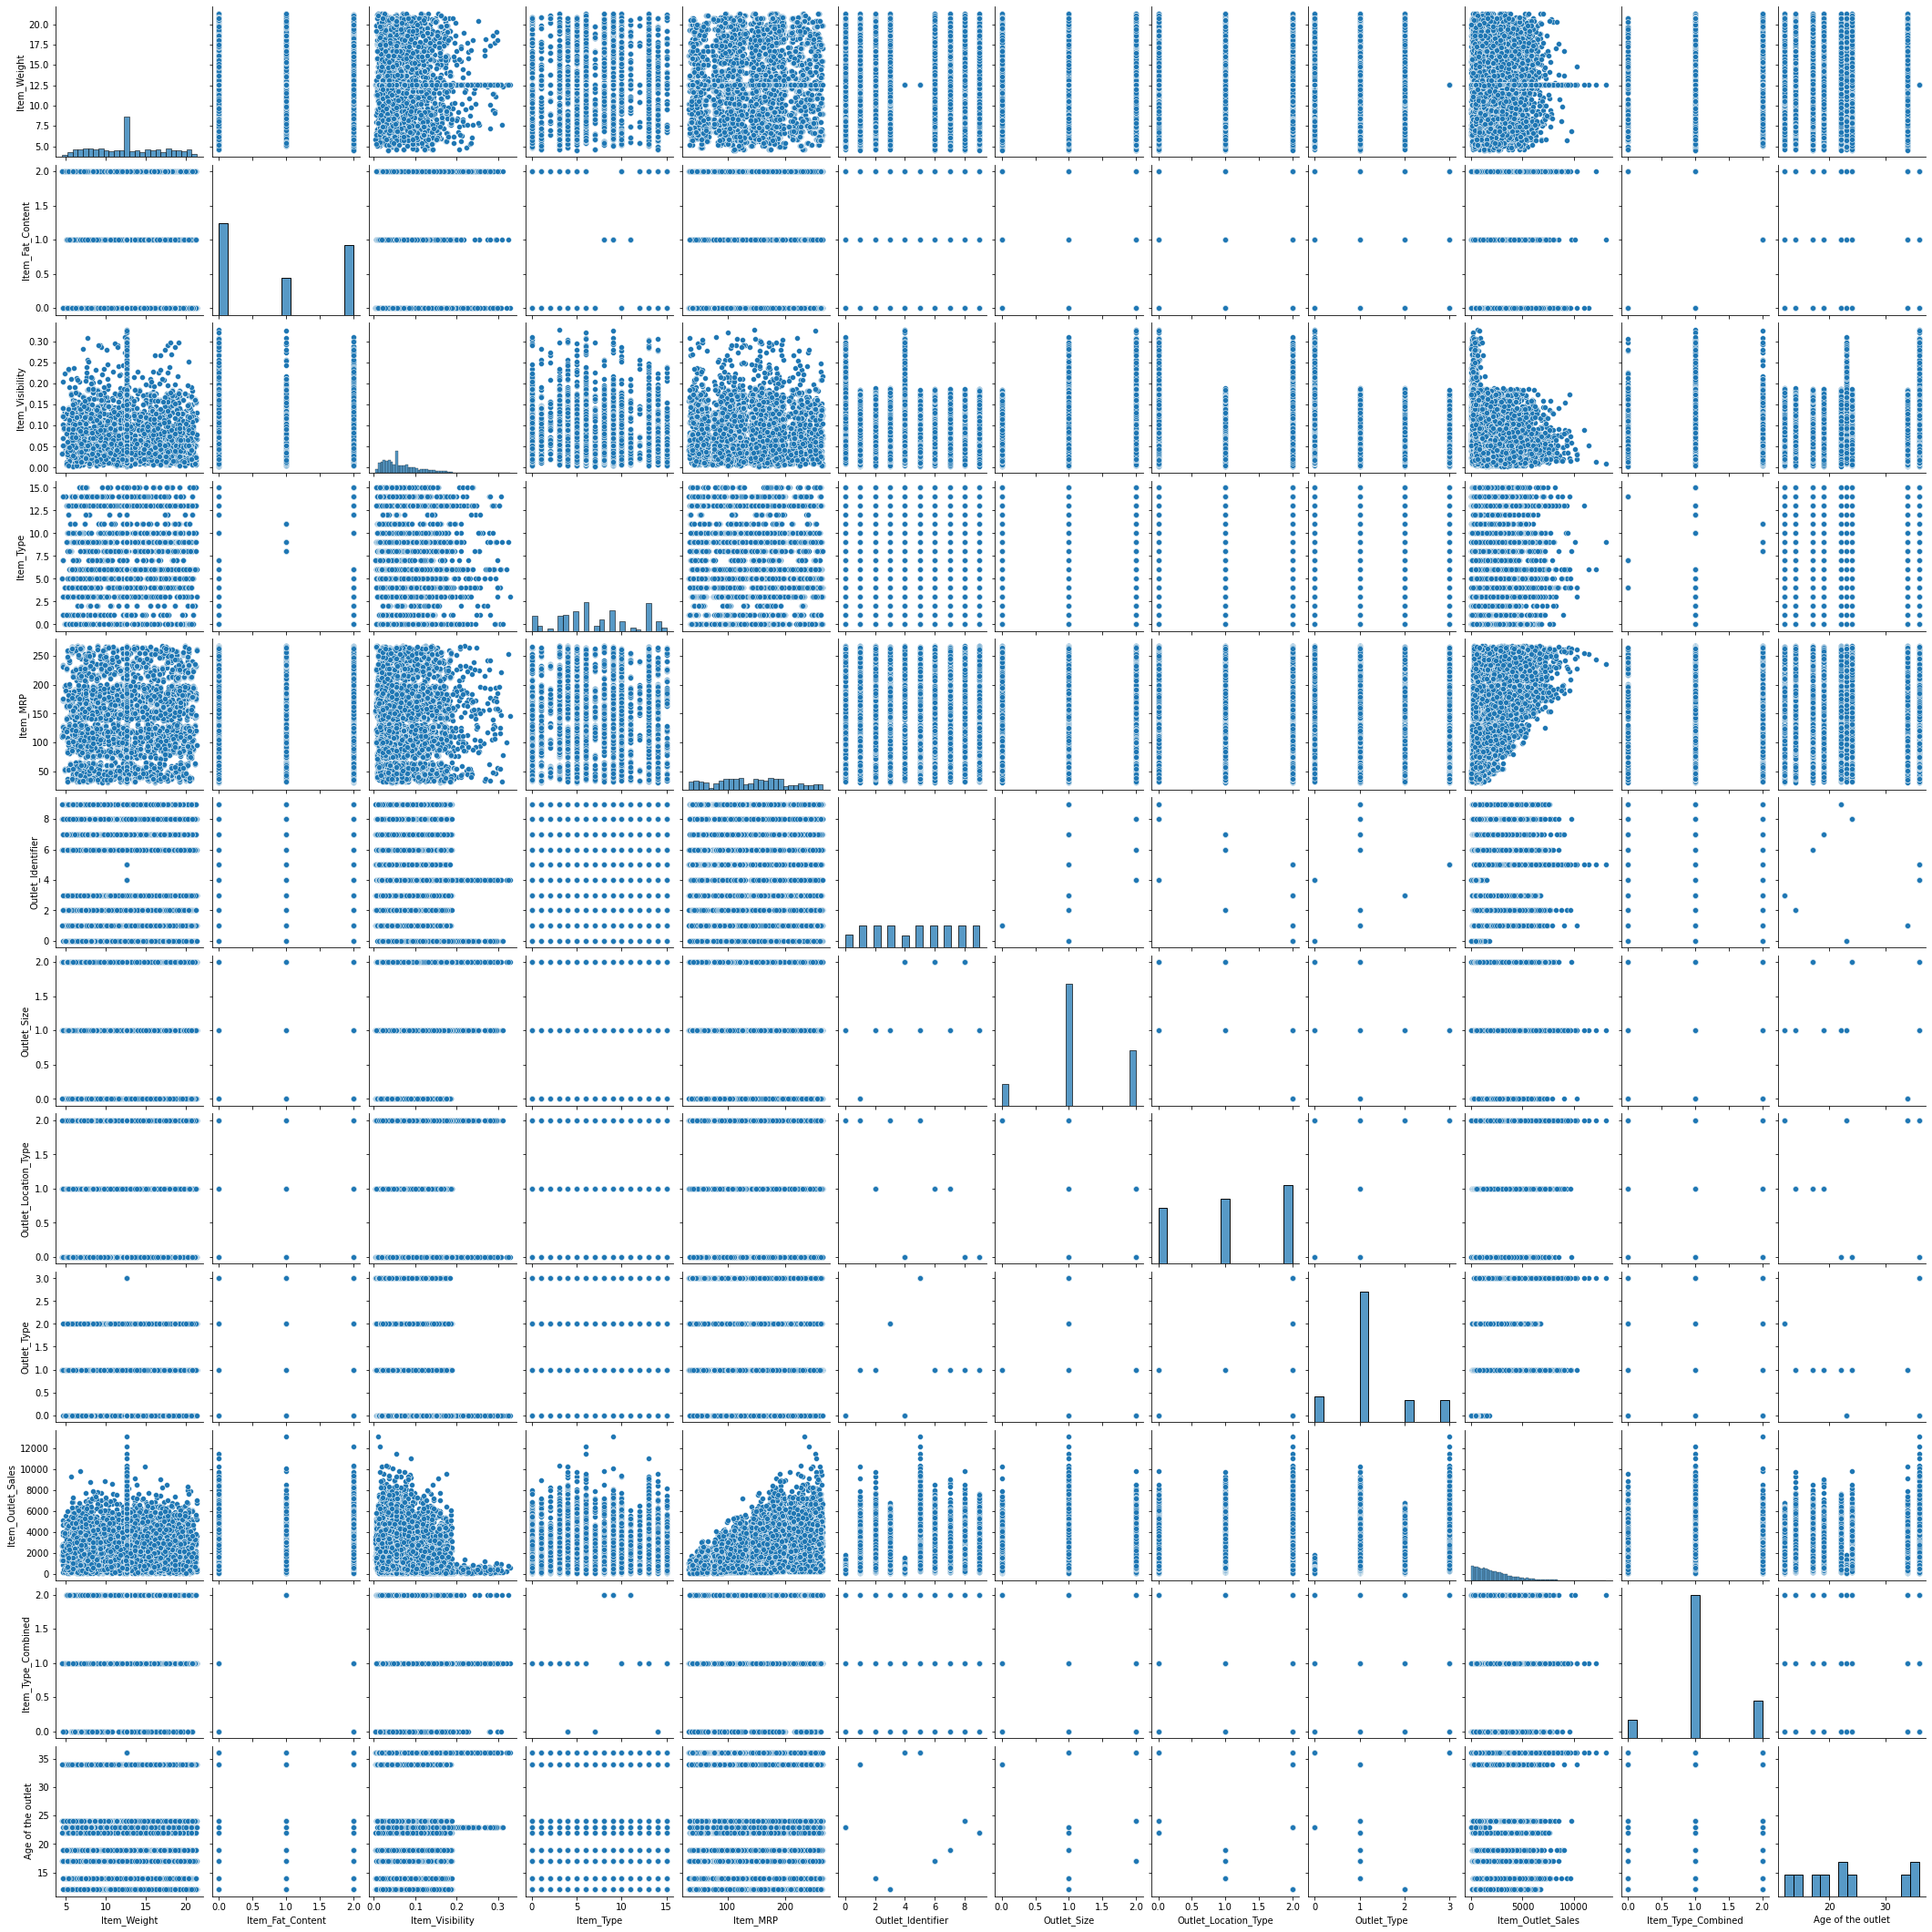

In [130]:
sn.pairplot(df_train)

we can see in the year when it initially started that is 1990 the sale was the highest.

medium outlet size has the highest sales

tier2 has the highest sales

In [25]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())

filling the null values

In [26]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')

filled the null values

In [28]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Combined           0
dtype: int64

In [30]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

replaced the misspelled lf reg as low fat nd regular

In [31]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

In [32]:
df_train['Age of the outlet']=2021-df_train['Outlet_Establishment_Year']

changed the outlest establishment year to the age of the outlet now

In [34]:
df_train.drop('Outlet_Establishment_Year',axis=1,inplace=True)

dropped the column

In [35]:
df_train.shape

(8523, 13)

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
df_train['Item_Fat_Content'] = LB.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = LB.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier'] = LB.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size'] = LB.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = LB.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = LB.fit_transform(df_train['Outlet_Type'])
df_train['Item_Type_Combined'] = LB.fit_transform(df_train['Item_Type_Combined'])


encoding all the categorical columns

In [40]:
df_train.drop('Item_Identifier',axis=1,inplace=True)

dropped the item identifier column as we made a new column from this column named item_type_combined

In [42]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
         935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
        1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
        1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
        2336, 2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895,
        3017, 3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458,
        3474, 3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884,
        3993, 4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656,
        4674, 4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031,
        5050, 5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550,
        5619, 5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946,
        5977, 6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541,
        6576, 6606, 6622, 6674, 6786, 

In [43]:
df_new=df_train[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(8333, 12)

In [44]:
Data_loss=((8523-8333)/8523)*100
Data_loss

2.229261996949431

after removing the outliers the data loss is less than 5-6%.

In [46]:
df_new.skew()

Item_Weight             0.118459
Item_Fat_Content        0.210184
Item_Visibility         0.904678
Item_Type               0.098030
Item_MRP                0.139010
Outlet_Identifier      -0.065525
Outlet_Size            -0.087904
Outlet_Location_Type   -0.202542
Outlet_Type             0.957916
Item_Outlet_Sales       0.877672
Item_Type_Combined      0.111642
Age of the outlet       0.423833
dtype: float64

In [47]:
df_new['Item_Visibility'] = np.sqrt(df_new['Item_Visibility'])

In [48]:
df_new.skew()

Item_Weight             0.118459
Item_Fat_Content        0.210184
Item_Visibility         0.279356
Item_Type               0.098030
Item_MRP                0.139010
Outlet_Identifier      -0.065525
Outlet_Size            -0.087904
Outlet_Location_Type   -0.202542
Outlet_Type             0.957916
Item_Outlet_Sales       0.877672
Item_Type_Combined      0.111642
Age of the outlet       0.423833
dtype: float64

removed the skewness from the item visibility column

In [49]:
cor=df_new.corr()

<AxesSubplot:>

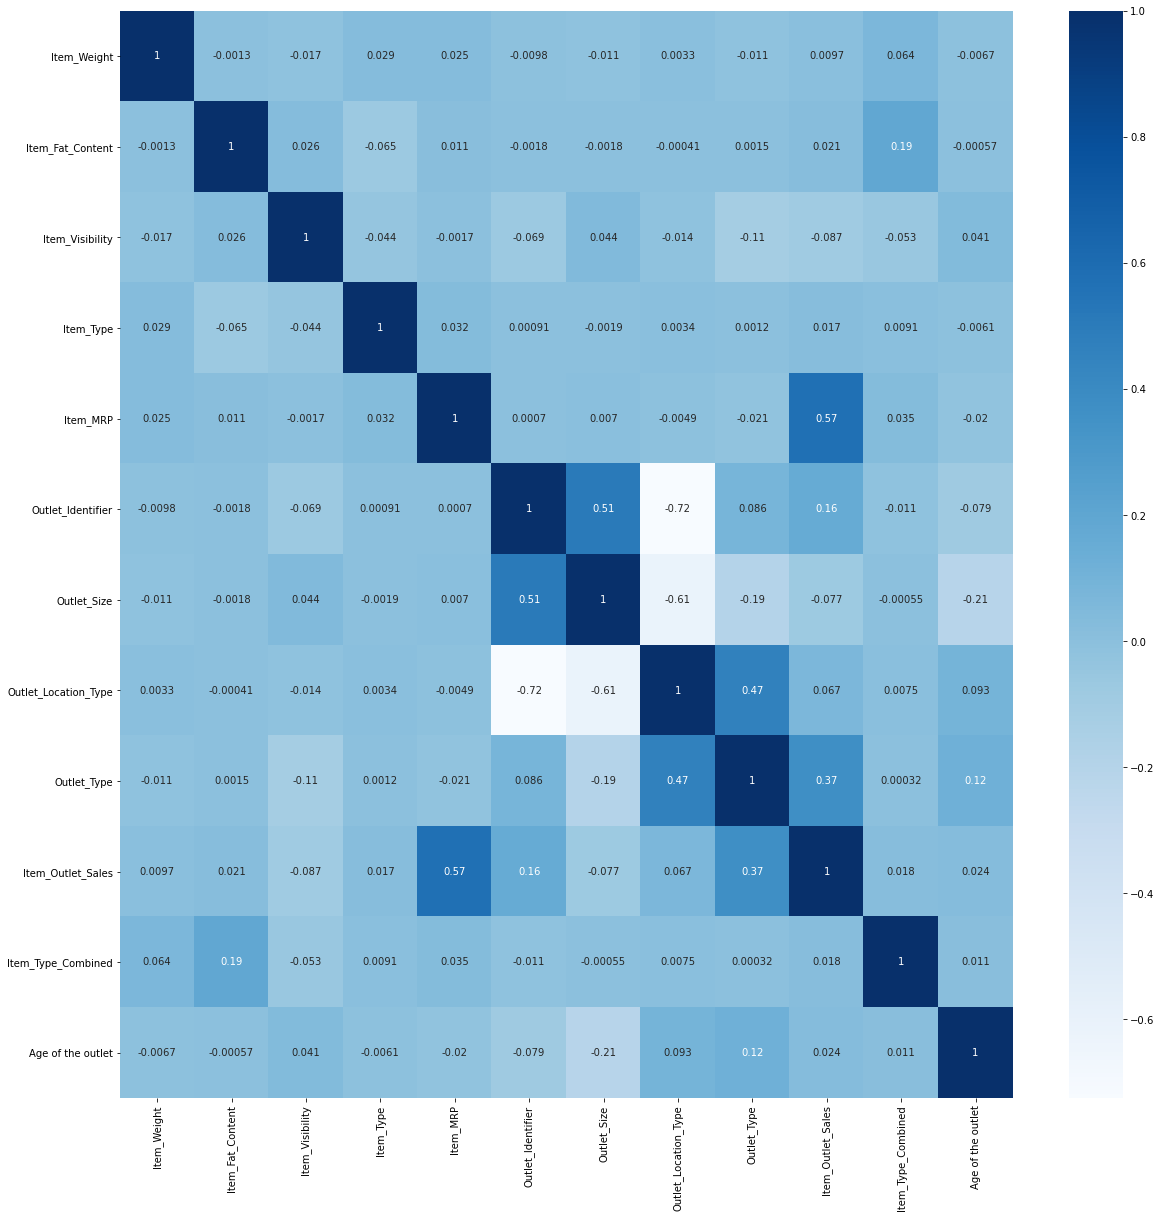

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))#6,4 is used for size
sn.heatmap(cor,annot=True,cmap='Blues')

item_mrp is highly correlated and item_visibility has the least correlation

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calc_vif(df_new):
    vif=pd.DataFrame()
    vif["variables"]=df_new.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
    return(vif)

In [53]:
calc_vif(df_new)

,variables,VIF FACTOR
0,Item_Weight,9.023746
1,Item_Fat_Content,2.071497
2,Item_Visibility,8.518057
3,Item_Type,3.832039
4,Item_MRP,9.808694
5,Outlet_Identifier,11.323033
6,Outlet_Size,6.923217
7,Outlet_Location_Type,10.762804
8,Outlet_Type,8.952176
9,Item_Outlet_Sales,5.636671


In [54]:
df_new.drop('Outlet_Identifier',axis=1,inplace=True)

as outlet identifier has the highest multicollinearity we will drop the column, it improves the accuracy.

In [55]:
calc_vif(df_new)

,variables,VIF FACTOR
0,Item_Weight,8.590764
1,Item_Fat_Content,2.067313
2,Item_Visibility,8.229074
3,Item_Type,3.767126
4,Item_MRP,9.737190
5,Outlet_Size,6.147907
6,Outlet_Location_Type,5.366339
7,Outlet_Type,5.918219
8,Item_Outlet_Sales,5.610570
9,Item_Type_Combined,5.317337


In [56]:
x=df_new.drop("Item_Outlet_Sales",axis=1)
y=df_new["Item_Outlet_Sales"]

splitting x and y for training

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [60]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.827110,-0.999419,-1.393575,-0.766903,1.772227,-0.278627,-1.370474,-0.260872,-0.182380,-0.120173
1,-1.621704,1.237829,-1.250303,1.609758,-1.482701,-0.278627,1.099284,1.021632,-2.091645,-1.322340
2,1.100602,-0.999419,-1.360809,0.659094,0.024908,-0.278627,-1.370474,-0.260872,-0.182380,-0.120173
3,1.500250,1.237829,-0.150753,-0.291571,0.678623,-0.278627,1.099284,-1.543375,-0.182380,0.000043
4,-0.914092,0.119205,-0.150753,0.421428,-1.392385,-1.940614,1.099284,-0.260872,1.726884,1.322426
...,...,...,...,...,...,...,...,...,...,...
8328,-1.399547,-0.999419,-0.079374,1.372092,1.202325,-1.940614,1.099284,-0.260872,-0.182380,1.322426
8329,-1.043390,1.237829,-0.332976,-1.717568,-0.515496,-0.278627,-0.135595,-0.260872,-0.182380,-0.480823
8330,-0.521497,0.119205,-0.676487,0.183761,-0.887511,1.383360,-0.135595,-0.260872,1.726884,-0.721256
8331,-1.318442,1.237829,1.601847,1.372092,-0.596632,-0.278627,1.099284,1.021632,-0.182380,-1.322340


scaled the x column

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [62]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.23738052371537388 on random state 98


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=98)

In [64]:
model=[DecisionTreeRegressor(),SVR(),LinearRegression(),KNeighborsRegressor()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('R2 score of' ,a, 'is:')
    print(r2_score(y_test,predm))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R2 score of DecisionTreeRegressor() is:
0.22955814833535748
error:
Mean absolute error: 999.930640509091
mean squared error: 1956051.1839184938
root Mean Squared Error:  1398.588997496582


R2 score of SVR() is:
0.05328117518806963
error:
Mean absolute error: 1192.4678456143686
mean squared error: 2403595.383753069
root Mean Squared Error:  1550.3533093308342


R2 score of LinearRegression() is:
0.5150745389609142
error:
Mean absolute error: 846.1737160127607
mean squared error: 1231162.377963087
root Mean Squared Error:  1109.5775673485325


R2 score of KNeighborsRegressor() is:
0.5219290236180117
error:
Mean absolute error: 804.0698576290908
mean squared error: 1213759.7371282238
root Mean Squared Error:  1101.7076459425266




In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.1356714  0.08154561 0.06994249 0.19008586 0.19342206]
0.1341334842077811
0.0520271790364366


In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVR(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.0464754  0.06347526 0.03868239 0.05901587 0.06311009]
0.0541518022812502
0.009890062114996075


In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.51294924 0.49509156 0.47697037 0.49368264 0.49206558]
0.494151874982502
0.011436790278295786


In [68]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.48753312 0.47557193 0.47749252 0.49241631 0.53459331]
0.49352143877631144
0.021462019959796547


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
ADB = GradientBoostingRegressor()
ADB.fit(x_train, y_train)
y_pred = ADB.predict(x_test)
print(r2_score(y_test,y_pred))

0.6080146964727482


In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ADB,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.59035468 0.57329949 0.5645088  0.59406639 0.59133884]
0.5827136404010892
0.011676531520024114


In [ ]:
#!pip install xgboost

In [71]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)
print(r2_score(y_test,y_pred))

0.5397113786450514


In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.51824236 0.51372303 0.47824873 0.51792024 0.53377543]
0.5123819570014954
0.018382455859557684


after seeing the model performance and the cross val score,Gradiest boosting regressor has the least difference between performance and cross val score.

In [80]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [81]:
parameter={'max_features':['auto','sqrt','log2'],
          'max_depth':np.arange(0,5),
          'min_samples_leaf':np.arange(0,5),
          'min_samples_split':np.arange(0,5)}

In [82]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4]),
                         'min_samples_split': array([0, 1, 2, 3, 4])})

In [84]:
GCV.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
ADB = GradientBoostingRegressor(max_depth=2,max_features='auto',min_samples_leaf=4,min_samples_split=2)
ADB.fit(x_train, y_train)
y_pred = ADB.predict(x_test)
print(r2_score(y_test,y_pred))

0.6103358243982814


after hyperparameter tuning the accuracy is 61.03%

In [86]:
import joblib
joblib.dump(ADB,"bigmartmodel.pkl")

['bigmartmodel.pkl']

saving the model

# Test Model

we are doing similar EDA and cleaning steps for the test dataset that we did for training dataset.

In [87]:
df_test=pd.read_csv("bigdatamart_Test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [88]:
df_test.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [89]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [90]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [91]:
df_test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [92]:
df_test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

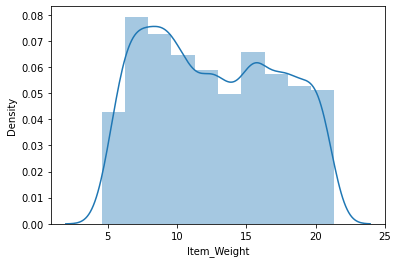

In [94]:
sn.distplot(df_test['Item_Weight'],bins=10)

In [102]:
a = (df_test['Item_Visibility'] == 0)

print ('Number of 0 values in item visibility: %d'%sum(a))

Number of 0 values in item visibility: 353


In [103]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Age of the outlet
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,23.171097
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,12.000000
25%,9.195000,0.027047,94.412000,17.000000
50%,12.500000,0.054154,141.415400,22.000000
75%,15.850000,0.093463,186.026600,34.000000
max,21.350000,0.323637,266.588400,36.000000


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

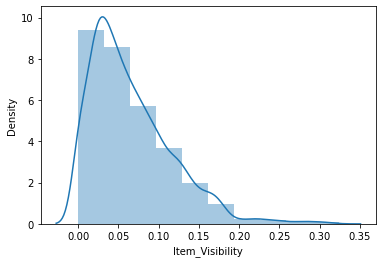

In [104]:
sn.distplot(df_test['Item_Visibility'],bins=10)

In [106]:
df_test['Item_Visibility']=df_test['Item_Visibility'].replace([0.000000],[0.054154])

In [107]:
#Get the first two characters of ID:
df_test['Item_Type_Combined'] = df_test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df_test['Item_Type_Combined'] = df_test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df_test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [95]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())

In [96]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [97]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna('Medium')

In [98]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [99]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [100]:
df_test['Age of the outlet']=2021-df_test['Outlet_Establishment_Year']

In [101]:
df_test.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [108]:
df_test.loc[df_test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [109]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age of the outlet,Item_Type_Combined
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14,Food
2,NCN55,14.600,Non-Edible,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,23,Non-Consumable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14,Food
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36,Food
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,24,Food
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,12,Food
5678,NCO17,10.000,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1,19,Non-Consumable
5679,FDJ26,15.300,Regular,0.054154,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1,14,Food


In [112]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
df_test['Item_Fat_Content'] = LB.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = LB.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier'] = LB.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size'] = LB.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = LB.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = LB.fit_transform(df_test['Outlet_Type'])
df_test['Item_Type_Combined'] = LB.fit_transform(df_test['Item_Type_Combined'])

In [113]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age of the outlet,Item_Type_Combined
0,FDW58,20.750,0,0.007565,13,107.8622,9,1,0,1,22,1
1,FDW14,8.300,2,0.038428,4,87.3198,2,1,1,1,14,1
2,NCN55,14.600,1,0.099575,11,241.7538,0,1,2,0,23,2
3,FDQ58,7.315,0,0.015388,13,155.0340,2,1,1,1,14,1
4,FDY38,12.500,2,0.118599,4,234.2300,5,1,2,3,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,8,2,0,1,24,1
5677,FDD47,7.600,2,0.142991,15,169.1448,3,1,2,2,12,1
5678,NCO17,10.000,1,0.073529,8,118.7440,7,1,1,1,19,2
5679,FDJ26,15.300,2,0.054154,3,214.6218,2,1,1,1,14,1


In [114]:
df_test.drop('Item_Identifier',axis=1,inplace=True)

In [117]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_test))
threshold=3
np.where(z>3)

(array([  46,   76,   78,   89,  138,  242,  333,  385,  474,  543,  637,
         858,  871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616,
        1710, 1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380,
        2393, 2504, 2516, 2561, 2605, 2609, 2625, 2628, 2652, 2677, 2721,
        2779, 2836, 2837, 2843, 3222, 3231, 3267, 3294, 3313, 3316, 3346,
        3378, 3502, 3638, 3679, 3970, 4052, 4147, 4159, 4208, 4255, 4328,
        4365, 4421, 4575, 4616, 4689, 4801, 4804, 4846, 4919, 4976, 4999,
        5121, 5157, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668],
       dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int64))

In [118]:
df_new_test=df_test[(z<3).all(axis=1)]
df_new_test.head()
df_new_test.shape

(5594, 11)

In [119]:
Data_loss=((5681-5594)/5681)*100
Data_loss

1.531420524555536

In [120]:
df_new_test.skew()

Item_Weight             0.164303
Item_Fat_Content        0.202178
Item_Visibility         0.897809
Item_Type               0.091592
Item_MRP                0.133769
Outlet_Identifier      -0.070394
Outlet_Size            -0.082637
Outlet_Location_Type   -0.212499
Outlet_Type             0.955296
Age of the outlet       0.412076
Item_Type_Combined      0.118812
dtype: float64

In [121]:
df_new_test['Item_Visibility'] = np.sqrt(df_test['Item_Visibility'])

In [122]:
df_new_test.skew()

Item_Weight             0.164303
Item_Fat_Content        0.202178
Item_Visibility         0.255885
Item_Type               0.091592
Item_MRP                0.133769
Outlet_Identifier      -0.070394
Outlet_Size            -0.082637
Outlet_Location_Type   -0.212499
Outlet_Type             0.955296
Age of the outlet       0.412076
Item_Type_Combined      0.118812
dtype: float64

In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_new_test=scaler.fit_transform(df_new_test)

In [124]:
df_new_test=pd.DataFrame(df_new_test)

In [125]:
df_new_test

,0,1,2,3,4,5,6,7,8,9,10
0,1.895929,-1.005122,-1.893139,1.364853,-0.538521,1.497632,-0.275831,-1.377890,-0.279078,-0.127940,-0.192713
1,-1.025039,1.234979,-0.574503,-0.767759,-0.871139,-0.977227,-0.275831,-0.142251,-0.279078,-1.085233,-0.192713
2,0.453041,0.114928,0.870749,0.890939,1.629419,-1.684330,-0.275831,1.093388,-1.547283,-0.008278,1.718699
3,-1.256135,-1.005122,-1.444856,1.364853,0.225273,-0.977227,-0.275831,-0.142251,-0.279078,-1.085233,-0.192713
4,-0.039652,1.234979,1.219322,-0.767759,1.507596,0.083426,-0.275831,1.093388,2.257333,1.547323,-0.192713
...,...,...,...,...,...,...,...,...,...,...,...
5589,-0.508884,1.234979,-1.540085,1.364853,0.003145,1.144080,1.390474,-1.377890,-0.279078,0.111383,-0.192713
5590,-1.189270,1.234979,1.627521,1.838767,0.453752,-0.623676,-0.275831,1.093388,0.989128,-1.324556,-0.192713
5591,-0.626192,0.114928,0.333961,0.180069,-0.362326,0.790529,-0.275831,-0.142251,-0.279078,-0.486925,1.718699
5592,0.617273,1.234979,-0.130978,-1.004716,1.190104,-0.977227,-0.275831,-0.142251,-0.279078,-1.085233,-0.192713


In [128]:
import joblib
ADB_from_joblib=joblib.load('bigmartmodel.pkl')

ADB_from_joblib.predict(x)


array([3977.53407404,  480.81005337, 2152.18199651, ..., 1411.46047535,
       1427.61230336, 1132.82873204])

did the predictions with the help of test dataset and saving it in the file below.

In [129]:
ADB_from_joblib=pd.DataFrame(ADB_from_joblib)
ADB_from_joblib.to_csv('prediction_bigmart.csv')